In [2]:
import numpy as np
from scipy import sparse
from matplotlib import pyplot as plt

import os

In [24]:
dire = "et10"

In [34]:
A_original = sparse.load_npz("data/simulated_large_A_23_10.npz")
x_flat = np.load("data/simulated_large_x_23_10.npy")
# x_flat[0] = 1
files = os.listdir(dire)
norms = []
mses = []
crlbs = []

In [35]:
for i, file in enumerate(files):
    log_norm = float(file.split("e")[-1][:-4])
    A = A_original*np.power(10, log_norm)
    crlb = np.linalg.inv(A.T@np.linalg.inv(np.diag(A@x_flat))@A)
    crlbs.append(crlb)
    mse = np.load(os.path.join(dire, file), allow_pickle=True)[:, -2]
    # print(mse.shape)
    mse = (mse*mse).mean()
    norm = np.power(10, log_norm)
    norms.append(norm)
    mses.append(mse)
    print(i, file, norm, mse)

0 etms_1638683461.3739464_batch_200_stop_0.001_norm_10e-0.20.npy 0.6309573444801932 14842.45538411523
1 etms_1638683499.803734_batch_200_stop_0.001_norm_10e 1.00.npy 10.0 1066.4067612105823
2 etms_1638683454.8637733_batch_200_stop_0.001_norm_10e-0.40.npy 0.3981071705534972 23564.671116861835
3 etms_1638683448.4857776_batch_200_stop_0.001_norm_10e-0.60.npy 0.251188643150958 37899.8390523673
4 etms_1638683474.1418903_batch_200_stop_0.001_norm_10e 0.20.npy 1.5848931924611136 6215.478952034725
5 etms_1638683442.076792_batch_200_stop_0.001_norm_10e-0.80.npy 0.15848931924611134 55726.14076759863
6 etms_1638683493.3844147_batch_200_stop_0.001_norm_10e 0.80.npy 6.309573444801933 1595.3898537683292
7 etms_1638683435.6469228_batch_200_stop_0.001_norm_10e-1.00.npy 0.1 86602.26292712714
8 etms_1638683486.9395204_batch_200_stop_0.001_norm_10e 0.60.npy 3.9810717055349722 2600.2125489970467
9 etms_1638683467.7883513_batch_200_stop_0.001_norm_10e 0.00.npy 1.0 9825.18724756725
10 etms_1638683480.454436

In [36]:
order = np.argsort(norms)

In [37]:
norms_ascend = []
mses_ascend = []
crlbs_ascend = []
for ix in order:
    norms_ascend.append(norms[ix])
    mses_ascend.append(mses[ix])
    crlbs_ascend.append(np.sum(np.diagonal(crlbs[ix])))

In [38]:
print(norms_ascend)
print(mses_ascend)
print(crlbs_ascend)

[0.1, 0.15848931924611134, 0.251188643150958, 0.3981071705534972, 0.6309573444801932, 1.0, 1.5848931924611136, 2.51188643150958, 3.9810717055349722, 6.309573444801933, 10.0]
[86602.26292712714, 55726.14076759863, 37899.8390523673, 23564.671116861835, 14842.45538411523, 9825.18724756725, 6215.478952034725, 3937.081135723152, 2600.2125489970467, 1595.3898537683292, 1066.4067612105823]
[102393.61530893567, 64606.0036070525, 40763.63247338363, 25720.113296772728, 16228.29438546142, 10239.361530893566, 6460.600360705249, 4076.3632473383645, 2572.0113296772715, 1622.8294385461415, 1023.9361530893565]


In [57]:
from matplotlib.ticker import FormatStrFormatter
import matplotlib

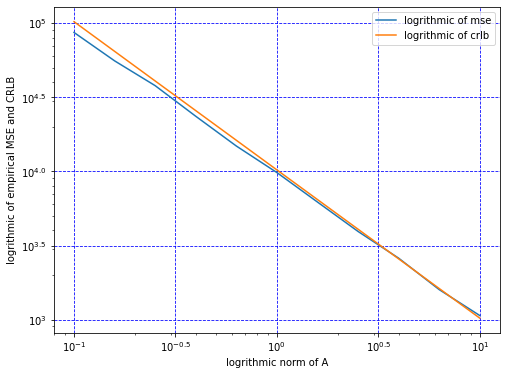

In [114]:
figure, ax = plt.subplots()
figure.set_size_inches(8, 6)

plt.plot(norms_ascend, mses_ascend)
plt.plot(norms_ascend, crlbs_ascend)
plt.xscale("log")
plt.yscale("log")
plt.xticks([np.power(10, -1.), np.power(10, -0.5), 1, np.power(10, 0.5), np.power(10, 1.0)], [r"$10^{-1}$", r"$10^{-0.5}$", r"$10^{0}$", r"$10^{0.5}$", r"$10^{1}$"])
plt.yticks([np.power(10, 3.), np.power(10, 3.5), np.power(10, 4.0), np.power(10, 4.5), np.power(10, 5.0) ], [r"$10^{3}$", r"$10^{3.5}$", r"$10^{4.0}$", r"$10^{4.5}$", r"$10^{5}$"])

# ax.xaxis.set_minor_locator(AutoMinorLocator())
# ax.xaxis.set_minor_locator(matplotlib.ticker.LogLocator(numticks=5))
# ax.yaxis.set_minor_locator(matplotlib.ticker.LogLocator(numticks=5))
# ax.tick_params(which='both', width=2)
# ax.tick_params(which='major', length=7)
# ax.tick_params(which='minor', length=4, color='r')
# ax = plt.gca()
# print(ax.xaxis.get_major_locator())
# print(ax.xaxis.get_minor_locator())
# ax.xaxis.set_major_locator(plt.MaxNLocator(11))
# ax.yaxis.set_major_locator(plt.MaxNLocator(11))
plt.legend(["logrithmic of mse", "logrithmic of crlb"])
plt.xlabel("logrithmic norm of A")
plt.ylabel("logrithmic of empirical MSE and CRLB")
plt.grid(b=True, which='major', color='b', linestyle='--')
# plt.grid(b=True, which='minor', color='r', linestyle='--')
plt.savefig("a_mse.png")
# plt.show()